<a href="https://colab.research.google.com/github/purduelamm/purdue_me597_iiot/blob/main/lab/lab2/L2_Colab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 2.1 Using the ADXL 345 accelerometer sensor

##Learning Goals

Students will be able to:
1.    Construct physical circuits that connect accelerometer sensors with Raspberry Pi
2.    Apply an algorithm to save data as a csv file using different frequency rates
3.   Utilize time and frequency-domain tools to analyze real data graphs
4.   Describe the steps to build a accelerometer that reads and processes data




## 1.1 Physical properties of the ADXL345 sensor

Most manufacturing machines are driven by rotational motion. Measuring the vibration of machinery gives us the physical behavior of it and helps us to model the system. If we have enough data set of the machinery in several cases, of course, we can develop a machine learning (ML) model as a data-driven machine monitoring approach. In Lab 2, we will measure the accelerations of machinery and perform basic signal processing. ADXL345 module and an axial flow fan will be used for the accelerometer and the target machine, respectively.


ADXL345 is a small, low power, complete three-axis MEMS accelerometer module accessible with SPI and I2C interfaces. The block diagram of the sensor is shown in Figure 1. According to the sensor module manufacturers, the module consists of 8- or 9-Pinout. The ADXL345 is good for many applications such as static acceleration of gravity in tilt-sensing, dynamic acceleration resulting from motion or shock. In case of tilt-sensing, it measures inclination changes less than 1.0°. The selected specifications of ADXL345 are summarized in Table 1.

If you need, visit ANALOG DEVICE web page (https://www.analog.com/en/products/adxl345.html) and see the datasheet. The maximum output data rate is 3200 Hz, and the minimum is 0.1 Hz. We will try to use both the maximum and the minimum output data rates in Lab2. To read/measure acceleration values of each axis, we will use I2C interface of Raspberry Pi and Adafruit Python package (ADXL34X, https://circuitpython.readthedocs.io/projects/adxl34x/en/latest/, available on Aug. 5, 2024).

<img src="https://github.com/purduelamm/purdue_me597_iiot/blob/main/lab/img/lab2_fig1.png?raw=true" width="70%">

*Figure 1 Functional block diagram of ADXL345<sup>1</sup>*

*Table 1 ADXL345 specifications<sup>1</sup>*

<table width="671">
<tbody>
<tr>
<td width="270">
<p>Parameter</p>
</td>
<td width="175">
<p>Conditions</p>
</td>
<td width="94">
<p>Min</p>
</td>
<td width="160">
<p>Typical</p>
</td>
<td width="94">
<p>Max</p>
</td>
<td width="42">
<p>Unit</p>
</td>
</tr>
<tr>
<td width="198">
<p>Measurement Range</p>
</td>
<td width="150">
<p>User selectable</p>
</td>
<td width="94">
<p>&nbsp;</p>
</td>
<td width="94">
<p>&plusmn;2 (default), &plusmn;4, &plusmn;8, &plusmn;16</p>
</td>
<td width="94">
<p>&nbsp;</p>
</td>
<td width="42">
<p>g</p>
</td>
</tr>
<tr>
<td width="198">
<p>Nonlinearity</p>
</td>
<td width="150">
<p>Percentage of full scale</p>
</td>
<td width="94">
<p>&nbsp;</p>
</td>
<td width="94">
<p>&plusmn;0.5</p>
</td>
<td width="94">
<p>&nbsp;</p>
</td>
<td width="42">
<p>%</p>
</td>
</tr>
<tr>
<td width="198">
<p>Inter-axis alignment error</p>
</td>
<td width="150">
<p>&nbsp;</p>
</td>
<td width="94">
<p>&nbsp;</p>
</td>
<td width="94">
<p>&plusmn;0.1</p>
</td>
<td width="94">
<p>&nbsp;</p>
</td>
<td width="42">
<p>&deg;</p>
</td>
</tr>
<tr>
<td width="198">
<p>Cross-axis sensitivity</p>
</td>
<td width="150">
<p>&nbsp;</p>
</td>
<td width="94">
<p>&nbsp;</p>
</td>
<td width="94">
<p>&plusmn;1</p>
</td>
<td width="94">
<p>&nbsp;</p>
</td>
<td width="42">
<p>%</p>
</td>
</tr>
<tr>
<td width="198">
<p>Output resolution</p>
</td>
<td width="150">
<p>&nbsp;</p>
</td>
<td width="94">
<p>10</p>
</td>
<td width="94">
<p>10</p>
</td>
<td width="94">
<p>13</p>
</td>
<td width="42">
<p>Bits</p>
</td>
</tr>
<tr>
<td width="198">
<p>Sensitivity deviation from ideal</p>
</td>
<td width="150">
<p>All g-range</p>
</td>
<td width="94">
<p>&nbsp;</p>
</td>
<td width="94">
<p>&plusmn;1</p>
</td>
<td width="94">
<p>&nbsp;</p>
</td>
<td width="42">
<p>%</p>
</td>
</tr>
<tr>
<td width="198">
<p>Sensitivity change due to temperature</p>
</td>
<td width="150">
<p>&nbsp;</p>
</td>
<td width="94">
<p>&nbsp;</p>
</td>
<td width="94">
<p>&plusmn;0.01</p>
</td>
<td width="94">
<p>&nbsp;</p>
</td>
<td width="42">
<p>%</p>
</td>
</tr>
<tr>
<td width="198">
<p>Output data rate</p>
</td>
<td width="150">
<p>User selectable</p>
</td>
<td width="94">
<p>0.1 (default)</p>
</td>
<td width="94">
<p>&nbsp;</p>
</td>
<td width="94">
<p>3200</p>
</td>
<td width="42">
<p>Hz</p>
</td>
</tr>
<tr>
<td width="198">
<p>Operating voltage range</p>
</td>
<td width="150">
<p>&nbsp;</p>
</td>
<td width="94">
<p>2</p>
</td>
<td width="94">
<p>2.5</p>
</td>
<td width="94">
<p>3.6</p>
</td>
<td width="42">
<p>V</p>
</td>
</tr>
<tr>
<td width="198">
<p>Operating temperature range</p>
</td>
<td width="150">
<p>&nbsp;</p>
</td>
<td width="94">
<p>-40</p>
</td>
<td width="94">
<p>&nbsp;</p>
</td>
<td width="94">
<p>85</p>
</td>
<td width="42">
<p>&deg;C</p>
</td>
</tr>
<tr>
<td width="198">
<p>Weight</p>
</td>
<td width="150">
<p>&nbsp;</p>
</td>
<td width="94">
<p>&nbsp;</p>
</td>
<td width="94">
<p>30</p>
</td>
<td width="94">
<p>&nbsp;</p>
</td>
<td width="42">
<p>mg</p>
</td>
</tr>
</tbody>
</table>


For the target machine, we will use an axial flow fan, AXIAL HS1238A (AC INFINITY Inc.) shown in Figure 2. It is an AC powered axial flow fan and applications are LED signs, server racks, cooling industrial machinery, arcade systems, ventilation systems, and more. The specifications of the fan are shown in Table 2.

<img src="https://github.com/purduelamm/purdue_me597_iiot/blob/main/lab/img/lab2_fig2.png?raw=true" width="40%">

*Figure 2 AXIAL HS1238A*

*Table 2 AXIAL HS1238A*

<table width="497">
<tbody>
<tr>
<td width="165">
<p>Parameter</p>
</td>
<td width="166">
<p>Value</p>
</td>
<td width="166">
<p>Unit</p>
</td>
</tr>
<tr>
<td width="165">
<p>Dimensions</p>
</td>
<td width="166">
<p>120 &times; 120 &times; 38</p>
</td>
<td width="166">
<p>mm</p>
</td>
</tr>
<tr>
<td width="165">
<p>Rated airflow rate</p>
</td>
<td width="166">
<p>110</p>
</td>
<td width="166">
<p>CFM</p>
</td>
</tr>
<tr>
<td width="165">
<p>Number of blades</p>
</td>
<td width="166">
<p>7</p>
</td>
<td width="166">
<p>Ea.</p>
</td>
</tr>
<tr>
<td width="165">
<p>Rated noise</p>
</td>
<td width="166">
<p>47</p>
</td>
<td width="166">
<p>dBA</p>
</td>
</tr>
<tr>
<td width="165">
<p>Rated rotational speed</p>
</td>
<td width="166">
<p>2600 &ndash; 3000</p>
</td>
<td width="166">
<p>RPM</p>
</td>
</tr>
<tr>
<td width="165">
<p>Operating voltage</p>
</td>
<td width="166">
<p>115</p>
</td>
<td width="166">
<p>VAC</p>
</td>
</tr>
<tr>
<td width="165">
<p>Rated power</p>
</td>
<td width="166">
<p>18</p>
</td>
<td width="166">
<p>W</p>
</td>
</tr>
<tr>
<td width="165">
<p>Rated current</p>
</td>
<td width="166">
<p>0.06</p>
</td>
<td width="166">
<p>A</p>
</td>
</tr>
<tr>
<td width="165">
<p>Rated static pressure</p>
</td>
<td width="166">
<p>9.1</p>
</td>
<td width="166">
<p>mm-H<sub>2</sub>O</p>
</td>
</tr>
<tr>
<td width="165">
<p>Operating humidity</p>
</td>
<td width="166">
<p>35 &ndash; 85</p>
</td>
<td width="166">
<p>%RH</p>
</td>
</tr>
<tr>
<td width="165">
<p>Operating temperature</p>
</td>
<td width="166">
<p>0 - 60</p>
</td>
<td width="166">
<p>&deg;C</p>
</td>
</tr>
</tbody>
</table>
<p>&nbsp;</p>


---
<sup>1</sup>ADXL345 – Data sheet, ANALOG DEVICES ([Data sheet manual](https://www.analog.com/media/en/technical-documentation/data-sheets/adxl345.pdf), available on Jan. 26, 2023)


## 1.2 Wiring connection for ADXL345

### Pinout information of the ADXL345 Module

There are two different types of ADXL345 modules. The sensor specifications are the same but the two have different pinouts. Figure 3 shows the pinout information of each sensor. For the wiring connection between ADXL345 and Raspberry Pi, only 4 pinouts will be used. The pinouts which are supposed to be used for I2C of Raspberry Pi are indicated as ***red color on yellow background box*** in Figure 3: ***V<sub>IN</sub>***, ***GND***, ***SDA***, and ***SDL***.Please note that V<sub>IN</sub> of Type 1 is the same as V<sub>CC</sub> of Type 2. The pin wiring connection between ADXL345 and Raspberry Pi is shown in Table 3.

<img src="https://github.com/purduelamm/purdue_me597_iiot/blob/main/lab/img/lab2_fig3.png?raw=true" width="90%">

*Figure 3 Pinout of ADXL345: Type 1 (left) and Type 2 (right)*

As a reminder, Pin 1 (3.3V power) and Pin 3 (GND) of Raspberry Pi have alternative pins. For information on the
GPIO pins of Raspberry Pi, refer to Figure 2 of [Lab1 manual](https://githubtocolab.com/purduelamm/purdue_me597_iiot/blob/main/lab/lab1/L1_Colab1.ipynb) or visit Sparkfun website
(https://learn.sparkfun.com/tutorials/introduction-to-the-raspberry-pi-gpio-and-physical-computing/gpio-pinsoverview, available on Jan. 26, 2023).

*Table 3 Pin wiring connection between ADXL345 and Raspberry Pi*
<table width="364">
<tbody>
<tr>
<td width="182">
<p>ADXL345</p>
</td>
<td width="182">
<p>Raspberry Pi</p>
</td>
</tr>
<tr>
<td width="182">
<p>V<sub>CC</sub> (or V<sub>IN</sub>)</p>
</td>
<td width="182">
<p>Pin 1 (3.3V power*)</p>
</td>
</tr>
<tr>
<td width="182">
<p>GND</p>
</td>
<td width="182">
<p>Pin 6 (GND*)</p>
</td>
</tr>
<tr>
<td width="182">
<p>SDA</p>
</td>
<td width="182">
<p>Pin 3 (SDA)</p>
</td>
</tr>
<tr>
<td width="182">
<p>SCL</p>
</td>
<td width="182">
<p>Pin 5 (SCL)</p>
</td>
</tr>
</tbody>
</table>

Using the given jumper wires and ADXL345 and breadboard assembly, make the wiring connection as Figure 4. Use an additional jumper wire to extend the wire, if needed. It’s easy to match the pin number if you connect the same color of each wire. If you are not sure about breadboard wiring rails, please visit the website (https://www.elecrow.com/blog/how-to-use-a-breadboard-for-beginners.html, available on Jan. 26, 2023).

<img src="https://github.com/purduelamm/purdue_me597_iiot/blob/main/lab/img/lab2_fig4.png?raw=true" width="90%">

*Figure 4. Wiring diagram for ADXL345 (left) and configuration (right)*

<img src="https://github.com/purduelamm/purdue_me597_iiot/blob/main/lab/img/lab2_fig5.png?raw=true" width="50%">

*Figure 5. Axis orientation of ADXL345*

The axis orientation of ADXL345 is shown Figure 5. You can find the orientation on top of the sensor as well. This sensor follows the right-hand rule of Cartesian coordinates. Therefore, if you know positive x- and ydirection, you can define positive z-direction. Because of the gravity of the Earth, it measures reaction acceleration in the positive z-direction in the case of the orientation as Figure 5. The gravitational acceleration of the Earth is approximately 9.81 m/s2 in the negative z-direction. So, if your sensor orientation is as Figure 5, the z-direction acceleration should be around +9.81 m/s2 and the others should be around 0 m/s2. Try to change the sensor orientations such as vertically erecting, flipping the assembly while the code is running and see if it measures the change of accelerations. You may think of various applications from this measurement. For example, by calculating the accelerations of the sensor, you can predict the orientation of the target object such as the robot arm, the moving axis of a machine, and so on.

### Check sensor connection through I2C

Let’s check whether ADXL345 is correctly connected to Raspberry Pi. First, access Raspberry Pi from your laptop via VNC Viewer or PuTTY. And then run the command below. You must see the result as Figure 6. You should at least see a number “53” as the red box of Figure 6. If nothing appears then make sure your connection between ADXL345 and Raspberry Pi. If you see an error, check enabling I2C interface from ‘*Raspberry Pi Configurations*’.

---
**<img src="https://github.com/purduelamm/purdue_me597_iiot/blob/main/lab/img/icon_RaspberryPi.png?raw=tru" width="20">Raspberry Pi - Terminal**

`sudo i2cdetect -y 1`

---

<img src="https://github.com/purduelamm/purdue_me597_iiot/blob/main/lab/img/lab2_fig6.png?raw=true" width="50%">

*Figure 6. Checking I2C device*

### Task 1.1

1.	Take a picture of your wiring configuration as Figure 4 (right) and attach it to the report.
2.	Capture the result of checking ADXL345 using I2C detection as Figure 6 and attach it to the report.


---

Place your screenshot in here.
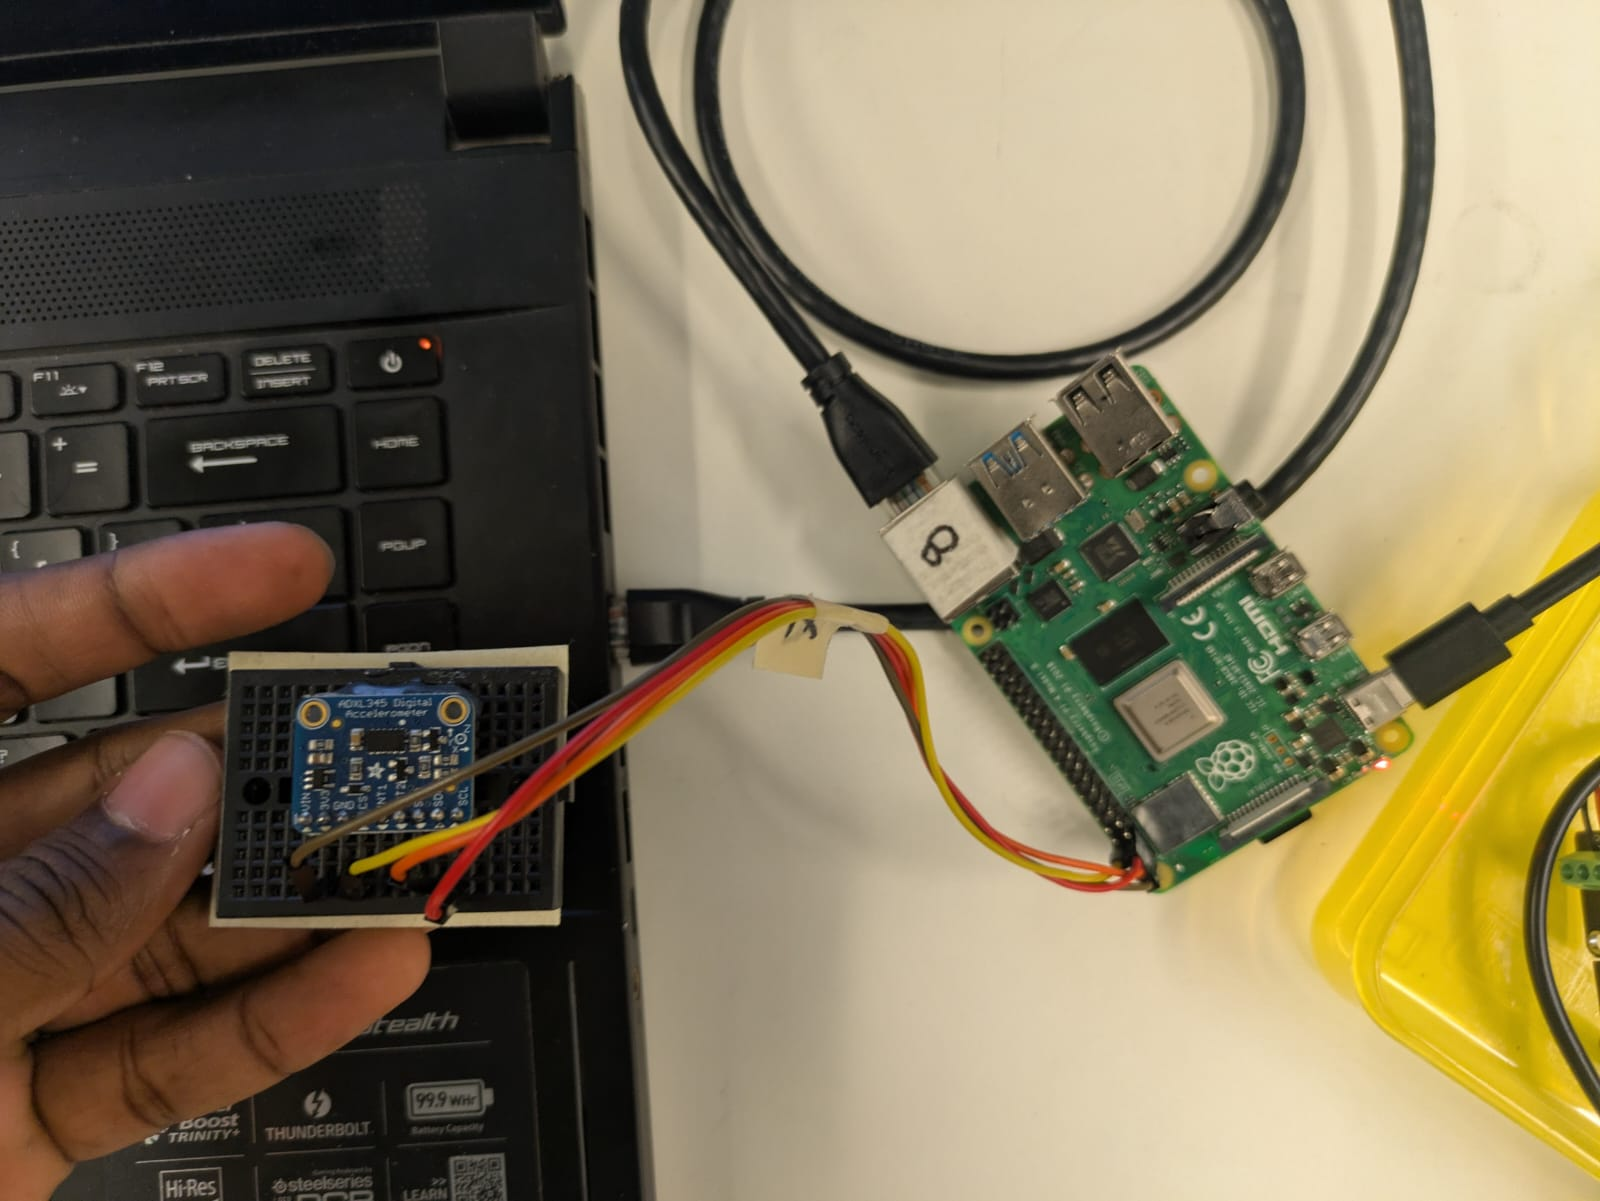
---

## 1.3 Measuring accelerations using I2C interface

### Sample code and sensor orientation

Using nano editor or Thonny IDE of Raspberry Pi, write the script, ‘lab3_sample1.py’ as below, and run. This code prints out the measured accelerations from 3-axis every 1 second with the timestamp at the same time. The ‘acc.acceleration’ returns the measured 3-axis accelerations, x-axis, y-axis, and z-axis, respectively. The data type is a tuple of it and each acceleration is float in m/s2 unit. Therefore, in the while loop of the sample, ‘x_acc’, ‘y_acc’, and ‘z_acc’ are x-axis acceleration, y-axis acceleration, and z-axis acceleration, respectively. Because this code runs infinitely, you need to forcefully halt it. To stop the code, press Ctrl+c in ‘Terminal’ or click ‘Stop’ button in Thonny IDE.



### Task 1.2

Copy and run the sample code below in Raspberry Pi terminal and then capture a screenshot and paste it in the below section


---
**<img src="https://github.com/purduelamm/purdue_me597_iiot/blob/main/lab/img/icon_Python.png?raw=tru" width="20">Python - Python3 ([lab2_sample1.py](https://github.com/purduelamm/purdue_me597_iiot/blob/main/lab/lab2/lab2_sample1.py))**

```
import time
import board
import busio
import adafruit_adxl34x
import datetime

# i2c variable defines I2C interfaces and GPIO pins using busio and board modules
i2c = busio.I2C(board.SCL, board.SDA)

# acc object is instantiation using i2c of Adafruit ADXL34X library
acc = adafruit_adxl34x.ADXL345(i2c)

while True: # To halt program, hit Ctrl + c or click Stop button
    now = datetime.datetime.now()
    x_acc, y_acc, z_acc = acc.acceleration
    print("{}: x-axis={:.4f}m/s^2, y-axis={:.4f}m/s^2, z-axis={:.4f}m/s^2".format(now, x_acc, y_acc, z_acc))
    time.sleep(1)
```

---



---

Place your screenshot in here.
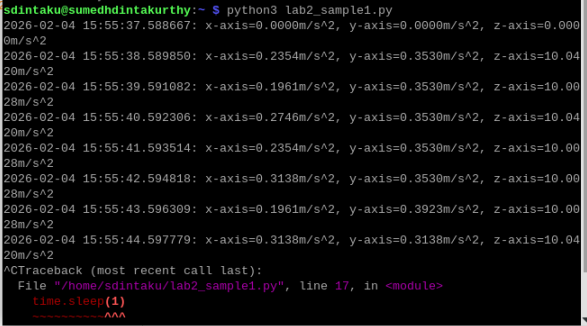
---



<img src="https://github.com/purduelamm/purdue_me597_iiot/blob/main/lab/img/lab2_fig7.png?raw=true" width="70%">

*Figure 7 Results of sample code 1: Terminal window (top) and Thonny IDE Shell (bottom)*


## 1.4 Save data in CSV file

Let’s save the measured accelerations with timestamps in a CSV file. The sample code, ‘lab2_sample2.py’, is given below. If you are getting hard to understand the code, please read the comment after the ‘#’ symbol. In Python, # means comment so that any code, command, and even line after ‘#’ are ignored by Python interpreter. This sample code 2 will save the measured timestamp, x-axis acceleration, y-axis acceleration, and z-axis acceleration, in each column for 2 minutes. While the code is running, you can see the measured values in the terminal window or Thonny IDE shell as well. If you open the saved CSV file, your data will look like Table 4.

*Table 4 CSV file example after running sample code 2*

<table width="488">
<tbody>
<tr>
<td width="168">
<p>Timestamp</p>
</td>
<td width="101">
<p>a_x [m/s2]</p>
</td>
<td width="104">
<p>a_y [m/s2]</p>
</td>
<td width="115">
<p>a_z [m/s2]</p>
</td>
</tr>
<tr>
<td width="168">
<p>&nbsp;</p>
</td>
<td width="101">
<p>&hellip;</p>
</td>
<td width="104">
<p>&nbsp;</p>
</td>
<td width="115">
<p>&nbsp;</p>
</td>
</tr>
<tr>
<td width="168">
<p>1/27/2022 16:51:23</p>
</td>
<td width="101">
<p>0.4314926</p>
</td>
<td width="104">
<p>0.3138128</p>
</td>
<td width="115">
<p>9.7674234</p>
</td>
</tr>
<tr>
<td width="168">
<p>1/27/2022 16:51:24</p>
</td>
<td width="101">
<p>0.4314926</p>
</td>
<td width="104">
<p>0.4707192</p>
</td>
<td width="115">
<p>9.80665</p>
</td>
</tr>
<tr>
<td width="168">
<p>1/27/2022 16:51:25</p>
</td>
<td width="101">
<p>0.5491724</p>
</td>
<td width="104">
<p>-0.0784532</p>
</td>
<td width="115">
<p>9.9635564</p>
</td>
</tr>
<tr>
<td width="168">
<p>1/27/2022 16:51:26</p>
</td>
<td width="101">
<p>-2.3928226</p>
</td>
<td width="104">
<p>0.392266</p>
</td>
<td width="115">
<p>9.3751574</p>
</td>
</tr>
<tr>
<td width="168">
<p>1/27/2022 16:51:27</p>
</td>
<td width="101">
<p>4.4718324</p>
</td>
<td width="104">
<p>0.2353596</p>
</td>
<td width="115">
<p>8.9044382</p>
</td>
</tr>
<tr>
<td width="168">
<p>&nbsp;</p>
</td>
<td width="101">
<p>&hellip;</p>
</td>
<td width="104">
<p>&nbsp;</p>
</td>
<td width="115">
<p>&nbsp;</p>
</td>
</tr>
</tbody>
</table>
<p>&nbsp;</p>


### Task 1.3

Use the following code in Raspberry Pi to read the data from the ADXL345 and save it as a csv file

---

**<img src="https://github.com/purduelamm/purdue_me597_iiot/blob/main/lab/img/icon_Python.png?raw=tru" width="20">Python - Python3 ([lab2_sample2.py](https://github.com/purduelamm/purdue_me597_iiot/blob/main/lab/lab2/lab2_sample2.py))**

```
import time
import board
import busio
import adafruit_adxl34x
import datetime
import csv

# i2c variable defines I2C interfaces and GPIO pins using busio and board modules
i2c = busio.I2C(board.SCL, board.SDA)

# acc object is instantiation using i2c of Adafruit ADXL34X library
acc = adafruit_adxl34x.ADXL345(i2c)

# filename and header
filename = datetime.datetime.now().strftime("%Y%m%d_%H%M%S") + "_lab2_fan_off.csv"
header = ["Timestamp", "a_x [m/s2]", "a_y [m/s2]", "a_z [m/s2]"]

start = time.time()# start time, unit = second

duration = 120 # data collection duration, unit = second, in this example, duration is 120 seconds, 2 minutes

i = 0 # measurement indicator

# writing to CSV file using csv package
with open(filename, 'w') as f:
    # creating a CSV wiriting object
    write = csv.writer(f)
    
    # writing header on the first row
    write.writerow(header)
    
    while time.time() - start < duration:
        i += 1 # indicator + 1 in every loop
        # timestamp for measurement
        timestamp = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")
        x_acc, y_acc, z_acc = acc.acceleration
        
        data = [timestamp, str(x_acc), str(y_acc), str(z_acc)] # data list, all elements are string data type
        
        write.writerow(data) # writing measured data
        
        # printing indicator, timestamp, x-axis, y-axis, z-axis accelerations
        print("{}th measurement, {}:\n x-axis={:.4f}m/s^2, y-axis={:.4f}m/s^2, z-axis={:.4f}m/s^2\n".format(i, timestamp, x_acc, y_acc, z_acc))
        
        time.sleep(1)

# gently close the CSV file object
f.close()
```

---


## 1.5 Measuring acceleration in high output data rate

### Increase output data rate

In this section, we will get acceleration values at the highest rate of ADXL345. Output data rate and rate code are shown in Table 5. The highest data rate is 3200 Hz and its bandwidth is 1600 Hz. In digital-output accelerometers, bandwidth is the highest frequency signal that can be sampled without aliasing by the specified output data rate. As the Nyquist sampling criterion, the bandwidth is defined by half of the output data rate.


*Table 5 Output data rate and rate code*

<table width="570">
<tbody>
<tr>
<td width="143">
<p>Output data rate (Hz)</p>
</td>
<td width="143">
<p>Bandwidth (Hz)</p>
</td>
<td width="143">
<p>Rate code (Binary)</p>
</td>
<td width="143">
<p>Rate code (Decimal)</p>
</td>
</tr>
<tr>
<td width="143">
<p>3200</p>
</td>
<td width="143">
<p>1600</p>
</td>
<td width="143">
<p>1111</p>
</td>
<td width="143">
<p>15</p>
</td>
</tr>
<tr>
<td width="143">
<p>1600</p>
</td>
<td width="143">
<p>800</p>
</td>
<td width="143">
<p>1110</p>
</td>
<td width="143">
<p>14</p>
</td>
</tr>
<tr>
<td width="143">
<p>800</p>
</td>
<td width="143">
<p>400</p>
</td>
<td width="143">
<p>1101</p>
</td>
<td width="143">
<p>13</p>
</td>
</tr>
<tr>
<td width="143">
<p>400</p>
</td>
<td width="143">
<p>200</p>
</td>
<td width="143">
<p>1100</p>
</td>
<td width="143">
<p>12</p>
</td>
</tr>
<tr>
<td width="143">
<p>200</p>
</td>
<td width="143">
<p>100</p>
</td>
<td width="143">
<p>1011</p>
</td>
<td width="143">
<p>11</p>
</td>
</tr>
<tr>
<td width="143">
<p>100</p>
</td>
<td width="143">
<p>50</p>
</td>
<td width="143">
<p>1010</p>
</td>
<td width="143">
<p>10</p>
</td>
</tr>
<tr>
<td width="143">
<p>50</p>
</td>
<td width="143">
<p>25</p>
</td>
<td width="143">
<p>1001</p>
</td>
<td width="143">
<p>9</p>
</td>
</tr>
<tr>
<td width="143">
<p>25</p>
</td>
<td width="143">
<p>12.5</p>
</td>
<td width="143">
<p>1000</p>
</td>
<td width="143">
<p>8</p>
</td>
</tr>
<tr>
<td width="143">
<p>12.5</p>
</td>
<td width="143">
<p>6.25</p>
</td>
<td width="143">
<p>0111</p>
</td>
<td width="143">
<p>7</p>
</td>
</tr>
<tr>
<td width="143">
<p>6.25</p>
</td>
<td width="143">
<p>3.13</p>
</td>
<td width="143">
<p>0110</p>
</td>
<td width="143">
<p>6</p>
</td>
</tr>
<tr>
<td width="143">
<p>3.13</p>
</td>
<td width="143">
<p>1.56</p>
</td>
<td width="143">
<p>0101</p>
</td>
<td width="143">
<p>5</p>
</td>
</tr>
<tr>
<td width="143">
<p>1.56</p>
</td>
<td width="143">
<p>0.78</p>
</td>
<td width="143">
<p>0100</p>
</td>
<td width="143">
<p>4</p>
</td>
</tr>
<tr>
<td width="143">
<p>0.78</p>
</td>
<td width="143">
<p>0.39</p>
</td>
<td width="143">
<p>0011</p>
</td>
<td width="143">
<p>3</p>
</td>
</tr>
<tr>
<td width="143">
<p>0.39</p>
</td>
<td width="143">
<p>0.2</p>
</td>
<td width="143">
<p>0010</p>
</td>
<td width="143">
<p>2</p>
</td>
</tr>
<tr>
<td width="143">
<p>0.2</p>
</td>
<td width="143">
<p>0.1</p>
</td>
<td width="143">
<p>0001</p>
</td>
<td width="143">
<p>1</p>
</td>
</tr>
<tr>
<td width="143">
<p>0.1 (Default)</p>
</td>
<td width="143">
<p>0.05</p>
</td>
<td width="143">
<p>0000</p>
</td>
<td width="143">
<p>0</p>
</td>
</tr>
</tbody>
</table>
<p>&nbsp;</p>



### Task 1.4


The sample code (lab2_sample3.py) to change output data rate is given. The sample code is to set the output data rate as 100 Hz. 'acc.data_rate=const(0b1010)' in the sample code is to tell ADXL345 to set the output data rate in the rate code 1010 (binary) which means the decimal rate code 10 and the output data rate is 100 Hz, respectively. Please note that ADXL will memorize the last rate code you set.

1. Modify 'acc.data_rate = const(0b1010)' line to set the highest output data rate, 3200 Hz, and run it (Check Table 5 to find its binary equivalent).


>  ※ Capture either one of terminal window as Figure 8 (left) or Thonny IDE Shell as Figure 8 (right) and attach it in the report.

<br></br>

<img src="https://github.com/purduelamm/purdue_me597_iiot/blob/main/lab/img/lab2_fig8.png?raw=true" width="90%">

*Figure 8 Results of sample code 3 after setting 3200 Hz output data rate: Terminal window (left) and Thonny IDE Shell (right)*

<br></br>

---
**<img src="https://github.com/purduelamm/purdue_me597_iiot/blob/main/lab/img/icon_Python.png?raw=tru" width="20">Python - Python3 ([lab2_sample3.py](https://github.com/purduelamm/purdue_me597_iiot/blob/main/lab/lab2/lab2_sample3.py))**

```
import time
import board
import busio
import adafruit_adxl34x
from micropython import const
import csv

# i2c variable defines I2C interfaces and GPIO pins using busio and board modules
i2c = busio.I2C(board.SCL, board.SDA)

# acc object is instantiation using i2c of Adafruit ADXL34X library
acc = adafruit_adxl34x.ADXL345(i2c)

# acc.data_rate, 0b means binary. 1010 = 10 = 100 Hz Output data rate
# so, if you want to change the output data rate as 3200 Hz, set it to 1111
# to change back to default (0.1 Hz), set it to 0000
acc.data_rate = const(0b1010)

# ratedict=output rate dictionary
# See Table5 of Lab3 manual key=rate code (decimal), value=output data rate (Hz)
ratedict = {15:3200,14:1600,13:800,12:400,11:200,10:100,9:50,8:25,7:12.5,6:6.25,5:3.13,4:1.56,3:0.78,2:0.39,1:0.2,0:0.1}

print("Output data rate is {} Hz.".format(ratedict[acc.data_rate]))

```
---


---

Place your screenshot in here.
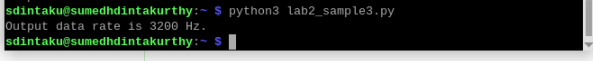
---

### Save CSV file in increased output data rate

The sample code below (lab2_sample4.py) allows you to read and copy data from sensor to a csv file using different frequency rates. Copy the code and paste it in Thonny (Raspberry PI).

The code collects 1000 times measurement data from each axis acceleration of ADXL345. And then all data are saved as a CSV file with timestamp. Try to run it so that you get the measured data in CSV format. **If you make the sampling rate 3200 Hz, the data collection time is approximately 1 sec. The sample rate is for all axes that means the actual sampling frequency is 1/3 of the sampling rate you set because of limitation of I2C protocol. For example, if the sampling rate is 3200 Hz, the actual sampling frequency of each axis is approximately 1067 Hz.**

<br></br>

---
**<img src="https://github.com/purduelamm/purdue_me597_iiot/blob/main/lab/img/icon_Python.png?raw=tru" width="20">Python - Python3 ([lab2_sample4.py](https://github.com/purduelamm/purdue_me597_iiot/blob/main/lab/lab2/lab2_sample4.py))**
```
import time
import board
import busio
import adafruit_adxl34x
from micropython import const
import csv
import datetime

# i2c variable defines I2C interfaces and GPIO pins using busio and board modules
i2c = busio.I2C(board.SCL, board.SDA)

# acc object is instantiation using i2c of Adafruit ADXL34X library
acc = adafruit_adxl34x.ADXL345(i2c)

# acc.data_rate, 0b means binary. 1010 = 10 = 100 Hz Output data rate
# so, if you want to change the output data rate as 3200 Hz, set it to 1111
# to change back to default (0.1 Hz), set it to 0000
acc.data_rate = const(0b1111)

# ratedict=output rate dictionary
# See Table5 of Lab3 manual key=rate code (decimal), value=output data rate (Hz)
ratedict = {15:3200,14:1600,13:800,12:400,11:200,10:100,9:50,8:25,7:12.5,6:6.25,5:3.13,4:1.56,3:0.78,2:0.39,1:0.2,0:0.1}

print("Output data rate is {} Hz.".format(ratedict[acc.data_rate]))

# === Data collection and saving ===
N = 1000 # number of samples (measurements)

T = [] # Sampling period
t = [] # time
data_x = [] # x-axis acceleration
data_y = [] # y-axis acceleration
data_z = [] # z-axis acceleration

# filename and header
filename = datetime.datetime.now().strftime("%Y%m%d_%H%M%S") + "_lab2_fan_off.csv"
header = ["T [sec]", "t [sec]", "a_x [m/s2]", "a_y [m/s2]", "a_z [m/s2]"]

t_0 = time.time() # to calculate t
for j in range(N):
    t_s = time.time() # to calculate T
    x_acc, y_acc, z_acc = acc.acceleration
    data_x.append(x_acc)
    data_y.append(y_acc)
    data_z.append(z_acc)
    T.append(time.time() - t_s)
    t.append(time.time() - t_0)

print("=== Collection takes {} seconds. ===".format(time.time() - t_0))
print("Filename is {}.".format(filename))

# Save data in a CSV file
with open(filename, 'w') as f:
    write = csv.writer(f)
    write.writerow(header)
    for k in range(N):
        write.writerow([str(T[k]), str(t[k]), str(data_x[k]), str(data_y[k]), str(data_z[k])])

f.close()
print("=== Data saving is done. ===")

```

---




Please continue to [Lab 2.2 here](https://colab.research.google.com/github/purduelamm/purdue_me597_iiot/blob/main/lab/lab2/L2_Colab2.ipynb).
